In [33]:
from sklearn.datasets import load_iris

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [34]:
cancer=load_iris()

In [35]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [36]:
cancer.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 150 (50 in each of three classes)\n:Number of Attributes: 4 numeric, predictive attributes and the class\n:Attribute Information:\n    - sepal length in cm\n    - sepal width in cm\n    - petal length in cm\n    - petal width in cm\n    - class:\n            - Iris-Setosa\n            - Iris-Versicolour\n            - Iris-Virginica\n\n:Summary Statistics:\n\n============== ==== ==== ======= ===== ====================\n                Min  Max   Mean    SD   Class Correlation\n============== ==== ==== ======= ===== ====================\nsepal length:   4.3  7.9   5.84   0.83    0.7826\nsepal width:    2.0  4.4   3.05   0.43   -0.4194\npetal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\npetal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n============== ==== ==== ======= ===== ====================\n\n:Missing Attribute Values: None\n:Class Distribution: 

In [37]:
cancer.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [38]:
cancer_df=pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df['target']=cancer.target
cancer_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [39]:
cancer_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [40]:
cancer_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [41]:
cancer_df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


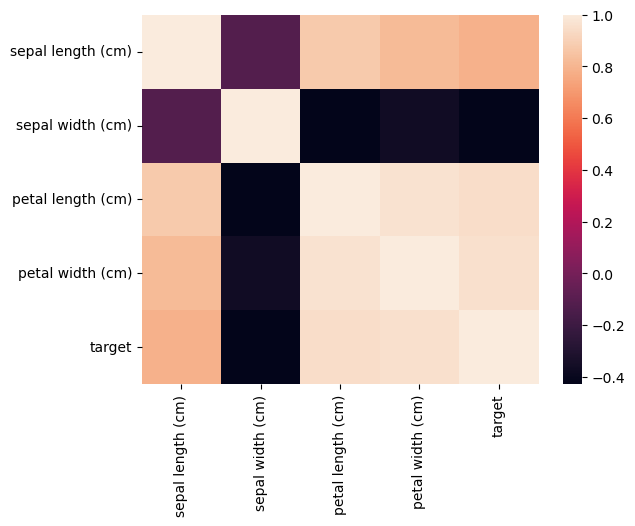

In [42]:
import seaborn as sns

heatmap=sns.heatmap(cancer_df.corr())
plt.show(heatmap)

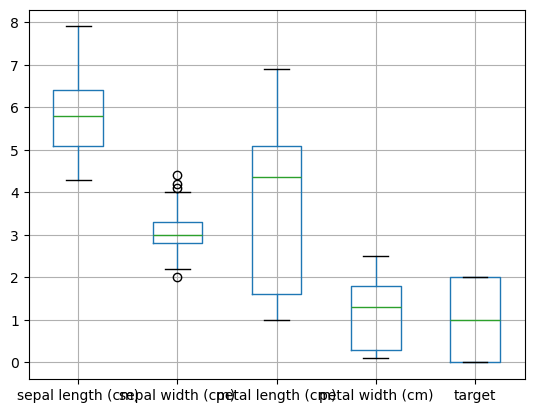

In [43]:
cancer_df.boxplot()
plt.show()

In [44]:
cancer_df.rename(columns={'sepal length (cm)': 'sepal_length', 'sepal width (cm)': 'sepal_width', 'petal length (cm)': 'petal_length', 'petal width (cm)': 'petal_width'}, inplace=True)

In [49]:
df_without_outliers = cancer_df[(cancer_df['sepal_width'] >= 2) | (cancer_df['sepal_width'] < 4)]

print(df_without_outliers)


     sepal_length  sepal_width  petal_length  petal_width  target
0             5.1          3.5           1.4          0.2       0
1             4.9          3.0           1.4          0.2       0
2             4.7          3.2           1.3          0.2       0
3             4.6          3.1           1.5          0.2       0
4             5.0          3.6           1.4          0.2       0
..            ...          ...           ...          ...     ...
145           6.7          3.0           5.2          2.3       2
146           6.3          2.5           5.0          1.9       2
147           6.5          3.0           5.2          2.0       2
148           6.2          3.4           5.4          2.3       2
149           5.9          3.0           5.1          1.8       2

[150 rows x 5 columns]


In [57]:
df_without_outliers['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [ ]:
##Works well only for binary classification. Mainly says how well the feature can differentiate good vs bad

def calculate_iv_all_features(df, target, n_bins=10):
    """
    Calculates the Information Value (IV) for all features in a DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.
        target (str): The name of the binary target variable (0 or 1).
        n_bins (int): The number of bins for continuous variables.

    Returns:
        pd.DataFrame: A DataFrame with each feature and its calculated IV.
    """
    iv_scores = {}
    
    # Calculate total events and non-events for the entire dataset
    total_events = df[target].sum()
    total_non_events = len(df) - total_events

    for feature in df.columns:
        if feature == target:
            continue
        
        temp_df = pd.DataFrame({
            'feature_bin': None,
            'target': df[target]
        })
        
        # Binning for continuous variables or use categories for categorical ones
        if pd.api.types.is_numeric_dtype(df[feature]) and df[feature].nunique() > n_bins:
            try:
                temp_df['feature_bin'] = pd.qcut(df[feature], q=n_bins, duplicates='drop')
            except ValueError:
                temp_df['feature_bin'] = pd.cut(df[feature], bins=n_bins, duplicates='drop')
        else:
            temp_df['feature_bin'] = df[feature]

        # Fix for the TypeError: add 'Missing' as a category before using fillna
        if pd.api.types.is_categorical_dtype(temp_df['feature_bin']):
            if 'Missing' not in temp_df['feature_bin'].cat.categories:
                temp_df['feature_bin'] = temp_df['feature_bin'].cat.add_categories('Missing')
        
        # Handle missing values as a separate category
        temp_df['feature_bin'] = temp_df['feature_bin'].fillna('Missing')
        
        # Create a contingency table
        iv_table = pd.crosstab(temp_df['feature_bin'], temp_df['target'])
        
        # Avoid division by zero by adding a small constant
        iv_table['events'] = iv_table[1] + 0.5 if 1 in iv_table.columns else 0.5
        iv_table['non_events'] = iv_table[0] + 0.5 if 0 in iv_table.columns else 0.5
        
        iv_table['dist_events'] = iv_table['events'] / (total_events + 0.5 * len(iv_table))
        iv_table['dist_non_events'] = iv_table['non_events'] / (total_non_events + 0.5 * len(iv_table))
        
        iv_table['woe'] = np.log(iv_table['dist_non_events'] / iv_table['dist_events'])
        iv_table['iv_contribution'] = (iv_table['dist_non_events'] - iv_table['dist_events']) * iv_table['woe']
        
        iv_scores[feature] = iv_table['iv_contribution'].sum()
        
    return pd.DataFrame.from_dict(iv_scores, orient='index', columns=['IV']).sort_values(by='IV', ascending=False)

In [ ]:
iv_details = calculate_iv_all_features(df_without_outliers, target='target')
print(iv_details)

##petalwidth, petal_length, sepal_width are suspisiosly too good. sepal_length is helping good in predicting the output

                     IV
petal_width   84.024016
petal_length  70.811669
sepal_width   60.311827
sepal_length  53.015061


/var/folders/9p/3wc2ydnx017fy60f_811wfxx6rgjhb/T/ipykernel_45902/323630583.py:38: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(temp_df['feature_bin']):
/var/folders/9p/3wc2ydnx017fy60f_811wfxx6rgjhb/T/ipykernel_45902/323630583.py:38: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(temp_df['feature_bin']):
/var/folders/9p/3wc2ydnx017fy60f_811wfxx6rgjhb/T/ipykernel_45902/323630583.py:38: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(temp_df['feature_bin']):
/var/folders/9p/3wc2ydnx017fy60f_811wfxx6rgjhb/T/ipykernel_45902/323630583.py:38: DeprecationWarning: is_categorical_dtyp

In [60]:
##Recursikve feature elimination with cross valudation

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

X=df_without_outliers.drop('target', axis=1)
Y=df_without_outliers['target']

random_forest=RandomForestClassifier(n_estimators=10)

rfecv=RFECV(estimator=random_forest)
rfecv.fit(X,Y)

print('feature ranking', rfecv.ranking_)

feature ranking [1 1 1 1]


In [61]:
##Feature Importance
random_forest.fit(X,Y)
importances=random_forest.feature_importances_

for f,i in zip(X, importances):
    print(f'{f}: {i}')

sepal_length: 0.05530537796813569
sepal_width: 0.008216596714620595
petal_length: 0.5533656030457398
petal_width: 0.38311242227150394


In [62]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [63]:
##standardize data

from sklearn.preprocessing import StandardScaler

scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)

In [64]:
##Applying class weights
from sklearn.utils import compute_class_weight

classes=np.unique(y_train)
weights=compute_class_weight(classes=classes, y=y_train, class_weight='balanced')
class_weights_dict=dict(zip(classes, weights))

print(class_weights_dict)

{0: 1.0810810810810811, 1: 0.9523809523809523, 2: 0.975609756097561}


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

logistic=LogisticRegression(class_weight=class_weights_dict)
rf=RandomForestClassifier(max_depth=4, class_weight=class_weights_dict)
gradient_boost=GradientBoostingClassifier(learning_rate=0.2)

models=[logistic, rf, gradient_boost]

In [76]:
##Define hyperparameters
logistic_params={
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['saga']
}

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

params=[logistic_params, rf_params, gb_params]

model_param_dict=dict(zip(models, params))

print(model_param_dict)

{LogisticRegression(class_weight={0: 1.0810810810810811, 1: 0.9523809523809523,
                                 2: 0.975609756097561}): {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['saga']}, RandomForestClassifier(class_weight={0: 1.0810810810810811,
                                     1: 0.9523809523809523,
                                     2: 0.975609756097561},
                       max_depth=4): {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['sqrt', 'log2', None], 'criterion': ['gini', 'entropy']}, GradientBoostingClassifier(learning_rate=0.2): {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'subsample': [0.8, 0.9, 1.0], 'max_features': ['sqrt', 'log2', None]}}


In [77]:
from sklearn.model_selection import GridSearchCV

for model, params in model_param_dict.items():
    grid_search=GridSearchCV(
        estimator=model,
        param_grid=params,
        scoring='accuracy',
        cv=5
    )

    grid_search.fit(x_train, y_train)

    print(f"Best parameters{model}: ", grid_search.best_params_)
    print("Best cross-validation score: ", grid_search.best_score_)

    # Use the best estimator to make predictions on the test set
    best_model = grid_search.best_estimator_
    test_accuracy = best_model.score(x_test, y_test)

    print(f"Test set accuracy with best parameters{model}: {test_accuracy:.2f}")

/Users/kasula.pavani/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kasula.pavani/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kasula.pavani/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kasula.pavani/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kasula.pavani/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  

Best parametersLogisticRegression(class_weight={0: 1.0810810810810811, 1: 0.9523809523809523,
                                 2: 0.975609756097561}):  {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation score:  0.975
Test set accuracy with best parametersLogisticRegression(class_weight={0: 1.0810810810810811, 1: 0.9523809523809523,
                                 2: 0.975609756097561}): 0.90
Best parametersRandomForestClassifier(class_weight={0: 1.0810810810810811,
                                     1: 0.9523809523809523,
                                     2: 0.975609756097561},
                       max_depth=4):  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation score:  0.975
Test set accuracy with best parametersRandomForestClassifier(class_weight={0: 1.0810810810810811,
                                     1: 0.9523809523809523,
                          

In [80]:
model=LogisticRegression(class_weight={0: 1.0810810810810811, 1: 0.9523809523809523, 2: 0.975609756097561}, C=100, penalty='l1', solver='saga')
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

/Users/kasula.pavani/Desktop/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [82]:
from sklearn.metrics import classification_report

report=classification_report(y_pred=y_pred, y_true=y_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.62      0.77         8
           2       0.75      1.00      0.86         9

    accuracy                           0.90        30
   macro avg       0.92      0.88      0.88        30
weighted avg       0.93      0.90      0.90        30



In [83]:
import pickle

pickle.dump(model, open('model.pkl', 'wb'))

In [85]:
pickled_model=pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(x_test)

array([1, 2, 1, 1, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 1, 2, 0, 1,
       2, 2, 0, 0, 0, 0, 0, 2])